In [67]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from scipy.stats import zscore

In [110]:
wine_df = pd.read_csv('winequality-red.csv',sep=';')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [111]:
#check how many number of target quality is present
print('Totally we have 6 types of quality\n')
wine_df['quality'].value_counts()

Totally we have 6 types of quality



5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [112]:
#let's drop the quality target , so that it can be given to unsupervised algorithm
wine_unsuper_df = wine_df.drop('quality',axis=1)
wine_unsuper_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [146]:
#keep only 10 records for dendrogram visualisation
wine_unsuper_df10 = wine_unsuper_df[:10]
wine_unsuper_df10

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5


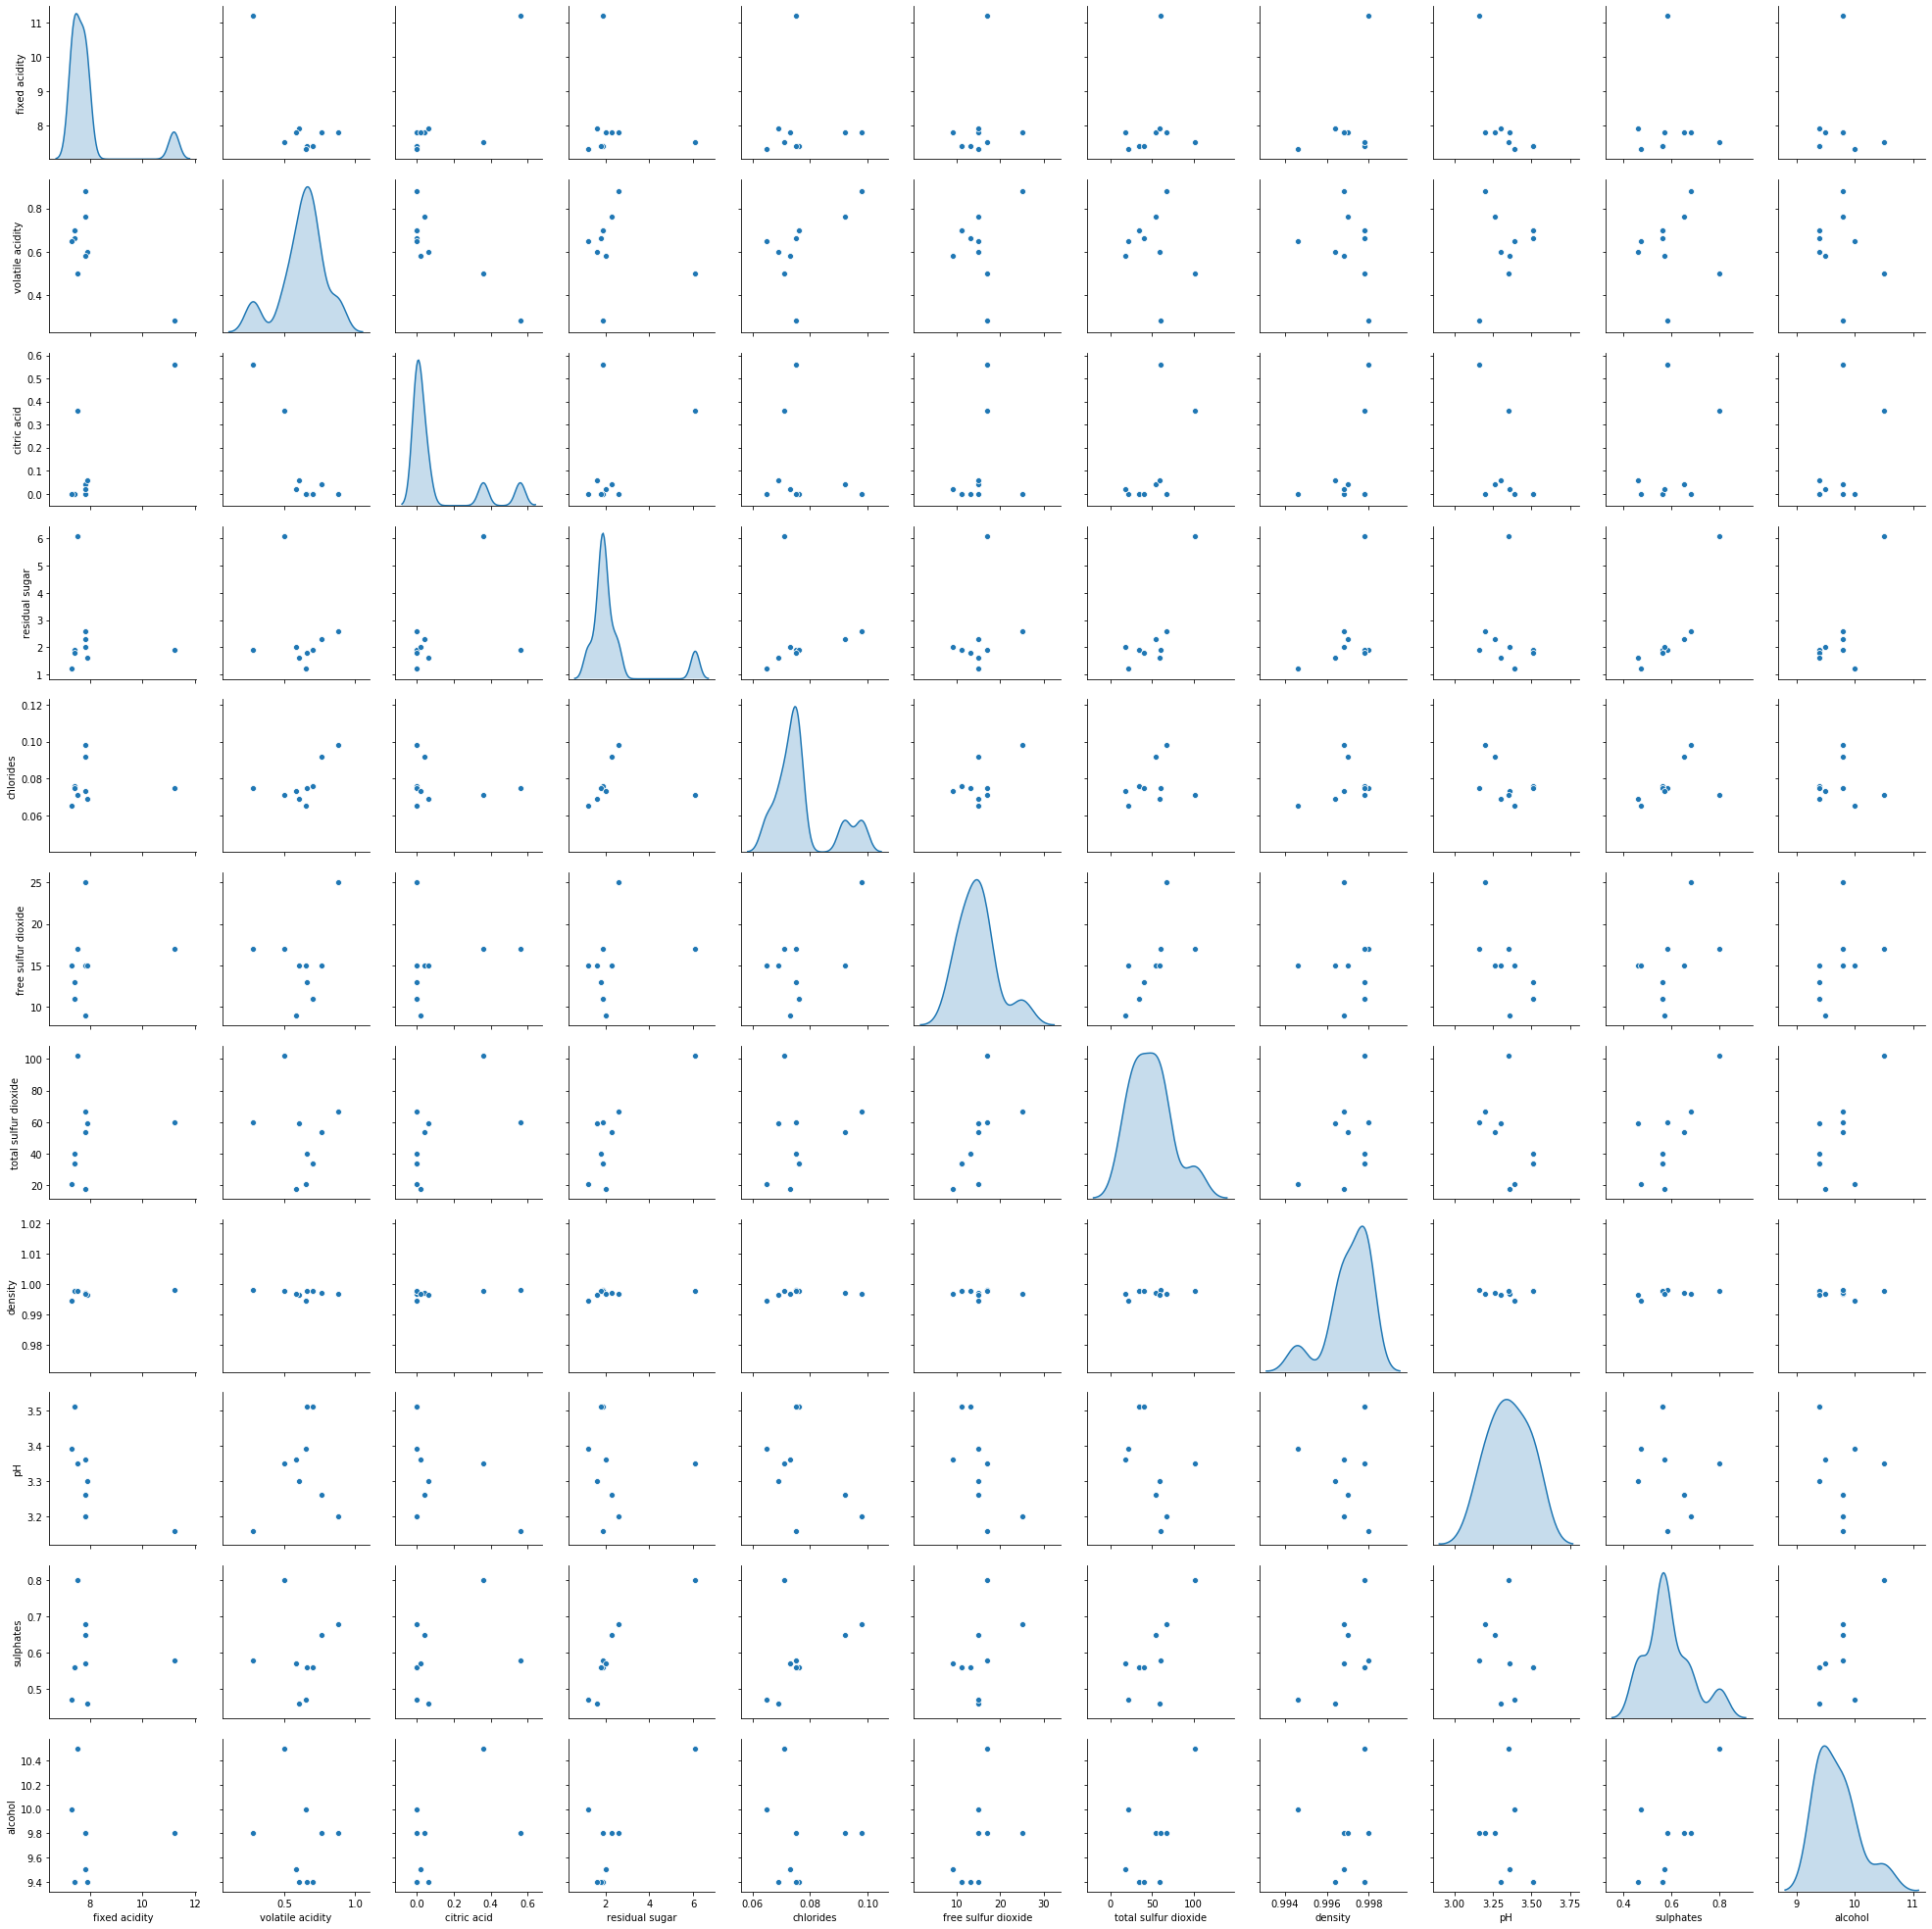

In [114]:
#create a pairplot to the distribution of data
sns.pairplot(wine_unsuper_df10,diag_kind = 'kde')

The diagonals have some multimodes or multiple peaks, which implies there exist multiple groups.

(11.0, 0.0)

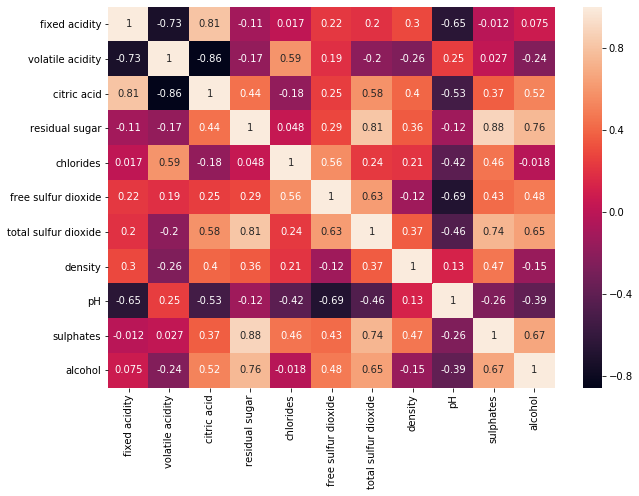

In [147]:
#find correlation between independent variables
plt.figure(figsize=(10,7))
ax = sns.heatmap(wine_unsuper_df10.corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Inference:
Some of the variables have average correlation of above 0.5 both in positive and negative direction.

In [148]:
#scale the data before the algorithm
wine_unsuper_dfscale = wine_unsuper_df10.apply(zscore)

In [149]:
#before applying the clustering technique create a dendrogram
#as this helps to decide on the number of clusters and the appropriate linkage to chose

link_type = ['single','complete','average','ward']
for i in link_type:
    clust_dist = linkage(wine_unsuper_dfscale,method=i,metric='euclidean')

    #find the cophenetic correlation by comparing the clustering distances 
    #and the euclidean distances
    cophen_corr, cophen_array  = cophenet(clust_dist, pdist(wine_unsuper_dfscale))

    print('cophenetic correlation of '+i+ ' method: ',cophen_corr)

cophenetic correlation of single method:  0.9273999869325381
cophenetic correlation of complete method:  0.9245413618888593
cophenetic correlation of average method:  0.9432704035127982
cophenetic correlation of ward method:  0.9108690587593493


As seen from the results, the average method seems to have better results

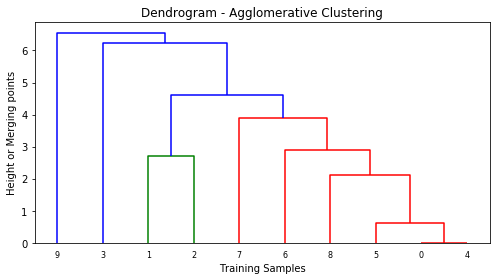

In [150]:
#display the dendrogram using average method
clust_dist = linkage(wine_unsuper_dfscale,method='average',metric='euclidean')

plt.figure(figsize=(7,4))
plt.title('Dendrogram - Agglomerative Clustering')
plt.xlabel('Training Samples')
plt.ylabel('Height or Merging points')
dendrogram(clust_dist,leaf_font_size = 8)
plt.tight_layout()

In [151]:
agglomerativeclustering = AgglomerativeClustering(affinity = 'euclidean', linkage='average', n_clusters=3)

In [152]:
agglomerativeclustering.fit(wine_unsuper_dfscale)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [153]:
#extract the labels
agglomerativeclustering.labels_

array([0, 0, 0, 2, 0, 0, 0, 0, 0, 1], dtype=int64)

In [154]:
wine_unsuper_df10['labels'] = agglomerativeclustering.labels_

C:\Users\Nandhu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002301239AA88>,
      dtype=object)

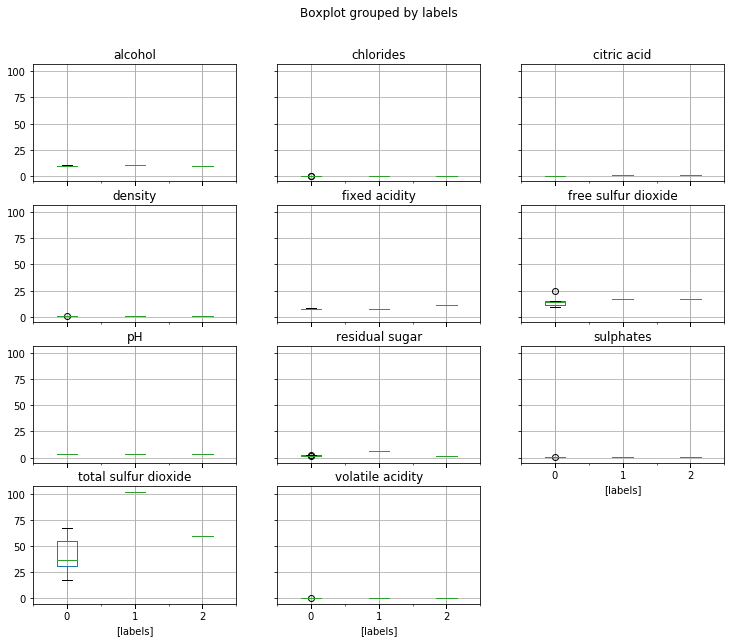

In [155]:
wine_unsuper_df10.boxplot(by='labels',figsize=(12,10))